데이터 : 패션 MNIST

# 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비

In [2]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

## 데이터 살펴보기

In [3]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
#train_input의 첫 번째 샘플을 출력해보자
np.set_printoptions(linewidth=4*29)
print(train_input[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

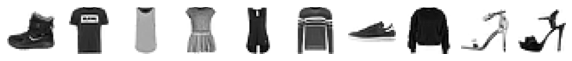

In [5]:
#훈련 데이터에서 몇 개의 샘플을 그림으로 출력
fig, axs = plt.subplots(1,10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [6]:
#이 샘플들의 타깃값 확인
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


패션 MNIST의 레이블 
```
  레이블      0     1     2      3     4    5    6      7      8       9
패션아이템  티셔츠 바지 스웨터 드레스 코트 샌달 셔츠 스니커즈 가방 앵클부츠
```

In [7]:
#레이블 당 샘플 개수 확인
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 데이터 정규화

In [8]:
train_scaled = train_input/255.0
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 784)


## 훈련 세트, 검증 세트 나누기

In [9]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [10]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


# 인공 신경망 연습

## 텐서플로 임포트

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

## 신경망 만들기

In [12]:
dense = Dense(10, activation='softmax', input_shape=(784,))
model = keras.Sequential(dense)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [13]:
#모델 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

#모델 훈련
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 8s 4ms/step - loss: 0.6070 - accuracy: 0.7937
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4789 - accuracy: 0.8399
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4561 - accuracy: 0.8485
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4436 - accuracy: 0.8525
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4369 - accuracy: 0.8561


In [14]:
#검증 세트로 모델 성능 확인
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4511 - accuracy: 0.8487


[0.4511291980743408, 0.8487499952316284]

# 심층 신경망 만들기

## 텐서플로 임포트

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

## 심층 신경망 만들기

In [16]:
dense1 = Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = Dense(10, activation='softmax')

model = keras.Sequential([dense1, dense2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## 층 추가 add()

In [17]:
model = keras.Sequential()
model.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## 모델 훈련

In [18]:
#모델 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

#모델 훈련
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5638 - accuracy: 0.8081
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4061 - accuracy: 0.8537
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3730 - accuracy: 0.8649
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3502 - accuracy: 0.8731
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3335 - accuracy: 0.8790


## Flatten, relu

In [19]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## 데이터 다시 준비

In [20]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

## 모델 훈련

In [21]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5279 - accuracy: 0.8134
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3913 - accuracy: 0.8594
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3540 - accuracy: 0.8724
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3339 - accuracy: 0.8801
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3202 - accuracy: 0.8868


In [22]:
# 성능 확인
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3613 - accuracy: 0.8733


[0.3613133132457733, 0.8733333349227905]

## 옵티마이저

adam으로 설정

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.8911
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2842 - accuracy: 0.8965
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2694 - accuracy: 0.8992
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2595 - accuracy: 0.9034
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2501 - accuracy: 0.9066


In [24]:
# 성능 확인
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3355 - accuracy: 0.8821


[0.33553677797317505, 0.8820833563804626]

# 신경망 모델 훈련

## 임포트

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

## 데이터 준비

In [26]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

## 모델 만드는 함수 정의

In [27]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(Dense(10, activation='softmax'))
  return model

In [28]:
model = model_fn()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## 모델 훈련 history

In [29]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [30]:
#history 딕셔너리
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


## 손실 그래프

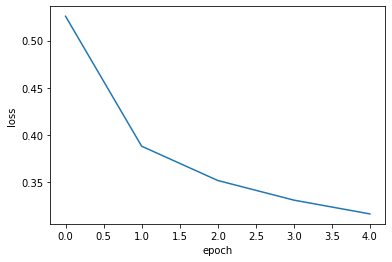

In [31]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

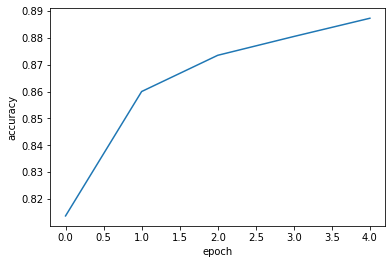

In [32]:
#정확도
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## 검증 손실

In [33]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [34]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


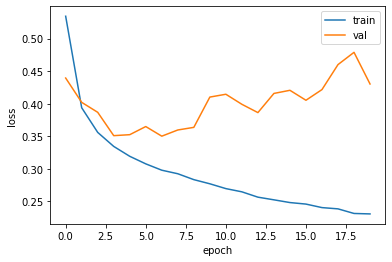

In [35]:
#그래프 그려서 확인
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 과대 적합 완화

### Optimizer Adam

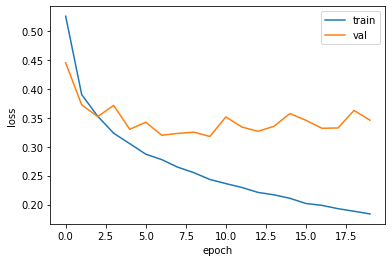

In [36]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### DropOut

In [37]:
 model = model_fn(Dropout(0.3))
 model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


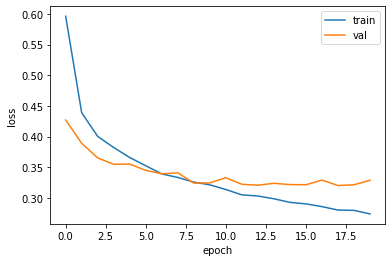

In [38]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## CallBacks

### ModelCheckpoint

In [39]:
model = model_fn(Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = ModelCheckpoint('best-model.h5', save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [40]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3192 - accuracy: 0.8855


[0.31924402713775635, 0.8855000138282776]

### EarlyStopping

In [41]:
model = model_fn(Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [42]:
print(early_stopping_cb.stopped_epoch)

9


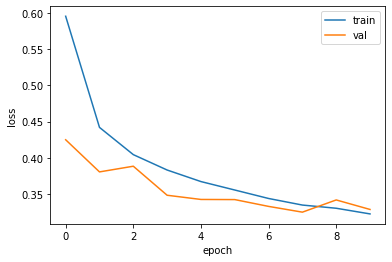

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [44]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3249 - accuracy: 0.8808


[0.32494276762008667, 0.8808333277702332]